# introduction to neural network classification with tensorflow

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples, 
                   noise = 0.03, 
                   random_state=42)


In [2]:
# Check out features
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels 
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

# Visualize the data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


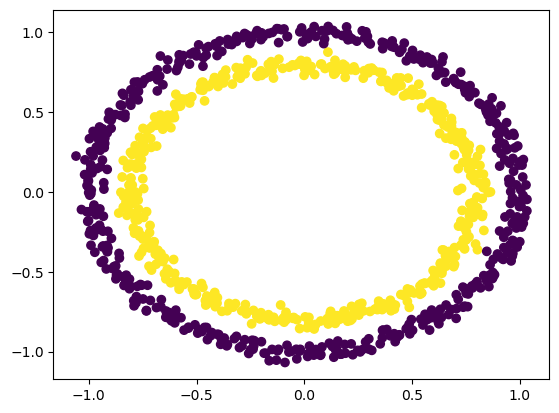

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

## input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
X[110], y[110]

(array([0.76597921, 0.29169219]), 1)

## steps in modelling

In [9]:
import tensorflow as tf

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.7647 - accuracy: 0.5020
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7607 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7568 - accuracy: 0.5010
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7532 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7497 - accuracy: 0.5010


In [10]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7479 - accuracy: 0.5010


[0.7479116320610046, 0.5009999871253967]

## Improving our model

In [11]:
# improve our model by training longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4960


[0.6931473612785339, 0.4959999918937683]

In [12]:
# improve our model by adding another layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)


In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5090


[0.7006665468215942, 0.5090000033378601]

## visualize our model prediction

In [14]:
import numpy as np


In [49]:

def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    #make predictions
    y_pred = model.predict(x_in)
    
    #check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


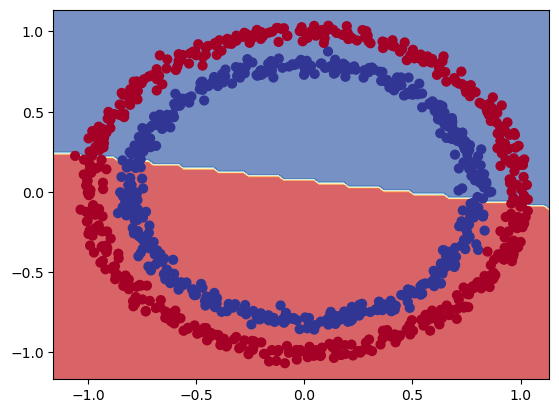

In [16]:
plot_decision_boundary(model_1, X, y)

In [17]:
# improve our model by adding activation function
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6690


[0.6640473008155823, 0.6690000295639038]

In [18]:
# let's see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #y = X + 100

#Split our data 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 377.8391 - mae: 377.8391
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 253.2074 - mae: 253.2074
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 130.8876 - mae: 130.8876
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 49.9883 - mae: 49.9883
Epoch 5/100
5/5 [==============================] - 0s 0s/step - loss: 83.1688 - mae: 83.1688
Epoch 6/100
5/5 [==============================] - 0s 0s/step - loss: 69.6761 - mae: 69.6761
Epoch 7/100
5/5 [==============================] - 0s 0s/step - loss: 43.5927 - mae: 43.5927
Epoch 8/100
5/5 [==============================] - 0s 0s/step - loss: 51.5578 - mae: 51.5578
Epoch 9/100
5/5 [==============================] - 0s 0s/step - loss: 41.8805 - mae: 41.8805
Epoch 10/100
5/5 [==============================] - 0s 0s/step - loss: 44.9896 - mae: 44.9896
Epoch 11/100
5/5 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 0s/step


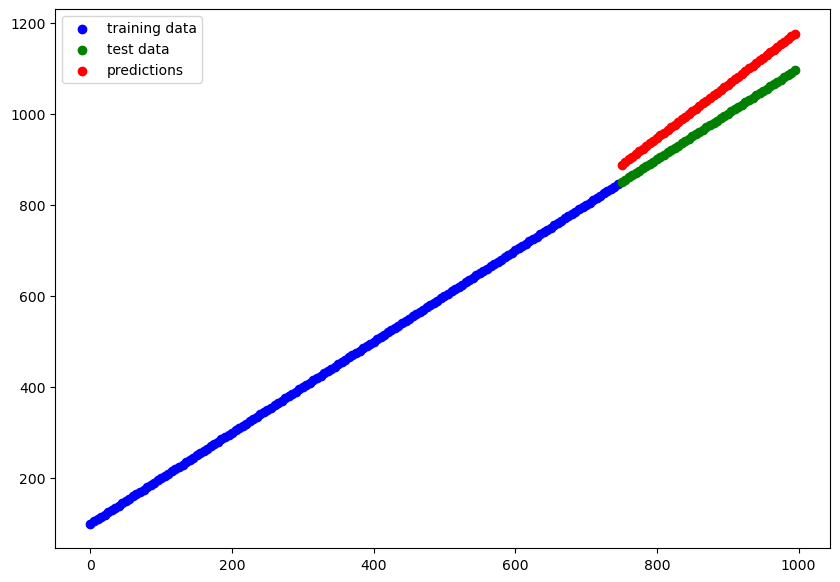

In [19]:
# make predictions with our trained model

y_reg_preds = model_4.predict(X_reg_test)

#plot the model's preditions 
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="predictions")
plt.legend()

## Non-linearity

In [20]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(lr=0.001), 
               metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3080 - accuracy: 0.4220
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2584 - accuracy: 0.4160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1940 - accuracy: 0.4100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1697 - accuracy: 0.4110
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1426 - accuracy: 0.4120
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0884 - accuracy: 0.4230
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0138 - accuracy: 0.4280
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9579 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9536 - accuracy: 0.4440
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9524 - accuracy: 0.4440
Epoch 11/

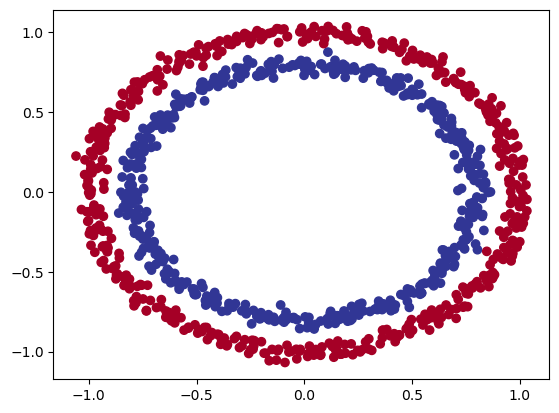

In [21]:
#check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


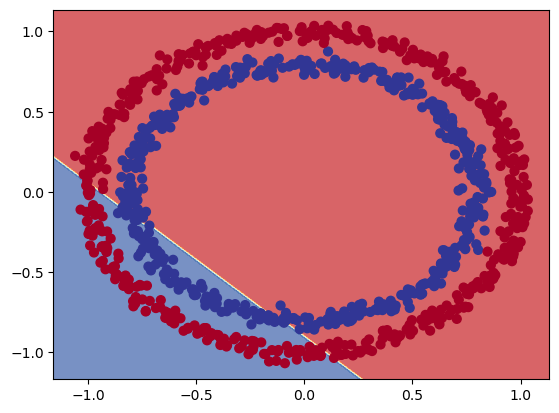

In [22]:
plot_decision_boundary(model_5, X, y)

In [23]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.4202 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4036 - accuracy: 0.4710
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4022 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3996 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3968 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3940 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3911 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3882 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3855 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3826 - accuracy: 0.4750
Epoch 11/

In [24]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.7668 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8442 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1915 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6706 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0994 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0535 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0221 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9950 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9521 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


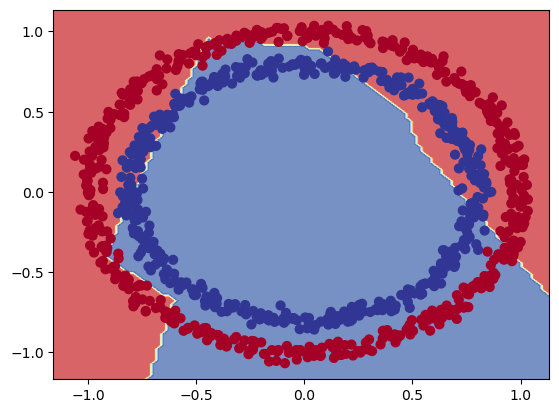

In [25]:
plot_decision_boundary(model_7, X, y)

In [26]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])
history = model_8.fit(X, y, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.4890
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5080
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5070
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5130
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5170
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5170
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5330
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5410
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5490
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5470
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


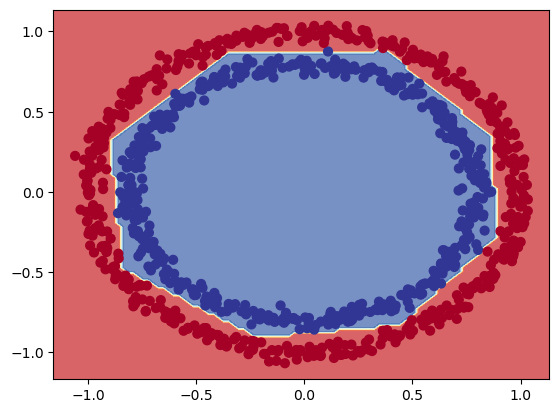

In [27]:
plot_decision_boundary(model_8, X, y)

In [28]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000


[0.007146424148231745, 1.0]

In [30]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

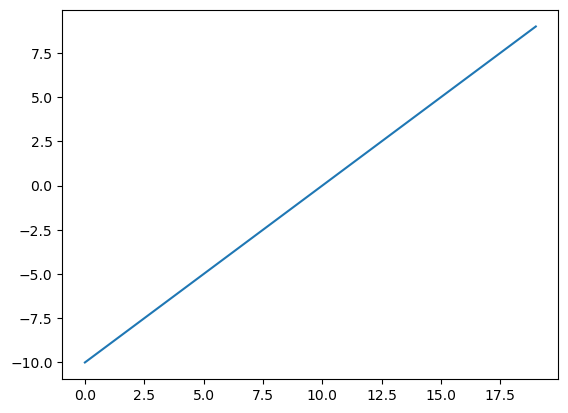

In [31]:
# Visualize our toy tensor
plt.plot(A)

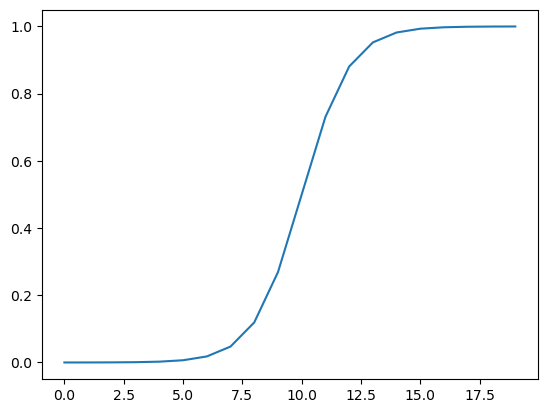

In [35]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sig_x = sigmoid(A)
plt.plot(sig_x)

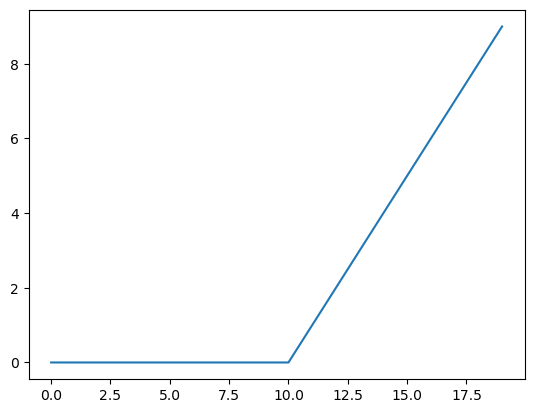

In [38]:
def relu(x):
    return tf.maximum(0, x)
relu_A = relu(A)
plt.plot(relu_A)

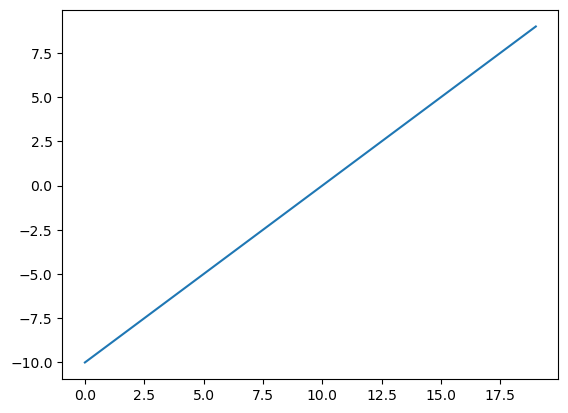

In [41]:
# linear activation function
linear_A = tf.keras.activations.linear(A)
plt.plot(linear_A)

## Evaluating and improving our classification

In [42]:
len(X)

1000

In [43]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
# recreate a model 
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5500
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6612
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.5825
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.6288
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6963
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6775
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.8025
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7700
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.8213
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.8763
Epoch 11/25
25/25 [

In [47]:
#evaluate the model on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9950


[0.0727066919207573, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


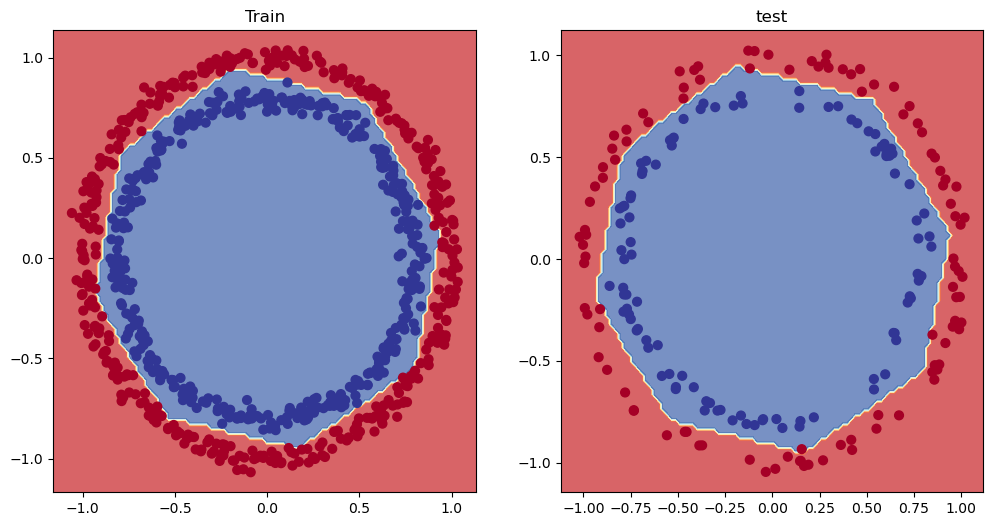

In [51]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_9, X_test, y_test)

## plot the loss curves

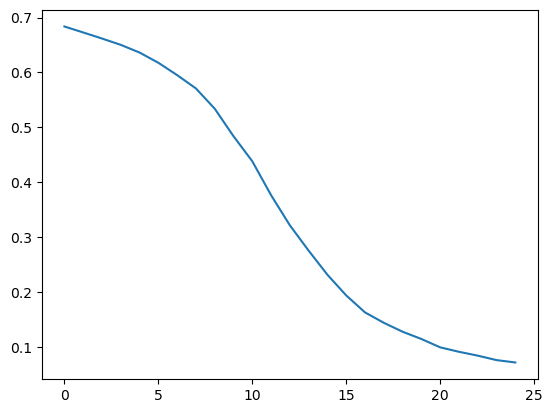

In [53]:
plt.plot(history.history['loss'])

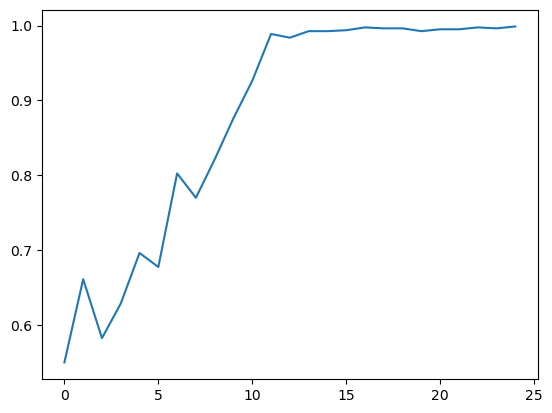

In [54]:
plt.plot(history.history['accuracy'])